<a href="https://colab.research.google.com/github/EmilSeyfullayev/Tensorflow-Developer-Professional-Certificate/blob/main/Exercises/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

--2022-03-12 14:43:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   161MB/s    in 0.4s    

2022-03-12 14:43:38 (161 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
train_dir = '/tmp/cats_and_dogs_filtered/train'
validation_dir = '/tmp/cats_and_dogs_filtered/validation'

In [7]:
os.listdir(train_dir)

['cats', 'dogs']

In [8]:
len(os.listdir(train_dir))

2

In [9]:
len(os.listdir(f'{train_dir}/dogs'))

1000

In [10]:
len(os.listdir(f'{train_dir}/cats'))

1000

In [11]:
import tensorflow as tf

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
generator_for_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [31]:
train_generator = generator_for_train.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [32]:
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_dir, 
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [19]:
history = model.fit(
    train_generator, 
    steps_per_epoch = 100, # 2000 images divided by 20 (batch_size)
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 50, # 1000 images divided by 20
)

Epoch 1/10
100/100 [==============================] - 17s 169ms/step - loss: 0.6026 - accuracy: 0.6815 - val_loss: 0.5820 - val_accuracy: 0.6940
Epoch 2/10
100/100 [==============================] - 17s 169ms/step - loss: 0.5939 - accuracy: 0.6820 - val_loss: 0.6178 - val_accuracy: 0.6500
Epoch 3/10
100/100 [==============================] - 17s 175ms/step - loss: 0.5921 - accuracy: 0.6835 - val_loss: 0.5644 - val_accuracy: 0.7100
Epoch 4/10
100/100 [==============================] - 17s 169ms/step - loss: 0.5813 - accuracy: 0.7020 - val_loss: 0.5703 - val_accuracy: 0.7030
Epoch 5/10
100/100 [==============================] - 17s 167ms/step - loss: 0.5858 - accuracy: 0.6855 - val_loss: 0.5369 - val_accuracy: 0.7180
Epoch 6/10
100/100 [==============================] - 17s 166ms/step - loss: 0.5745 - accuracy: 0.7010 - val_loss: 0.5287 - val_accuracy: 0.7380
Epoch 7/10
100/100 [==============================] - 17s 167ms/step - loss: 0.5600 - accuracy: 0.7055 - val_loss: 0.6742 - val_ac

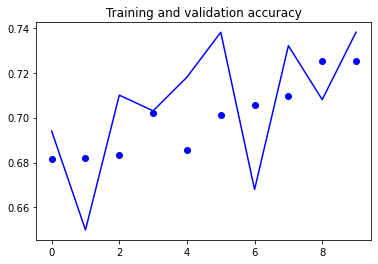

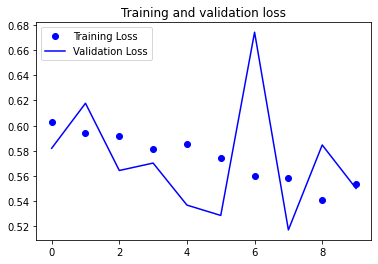

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Transfer Learning

In [19]:
efficientb4_url = "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1"

In [20]:
import tensorflow_hub as hub

In [55]:
from tensorflow.keras.applications.resnet_v2 import ResNet101V2

In [56]:
pretrained_model = ResNet101V2(
    input_shape=(150, 150, 3),
    include_top = False
)

171327488/171317808 [==============================] - 5s 0us/step


In [57]:
for layer in pretrained_model.layers:
  layer.trainable = False

In [58]:
last_layer = pretrained_model.layers[-1]

In [59]:
last_layer

In [60]:
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 2048)


In [61]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = Dropout(0.6)(x)                  
# Add a final sigmoid layer for classification
x = Dense  (1, activation='sigmoid')(x)           

model = Model(pretrained_model.input, x) 

model.compile(optimizer = RMSprop(), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [64]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 31s - loss: 0.9591 - accuracy: 0.9290 - val_loss: 0.4498 - val_accuracy: 0.9670 - 31s/epoch - 308ms/step
Epoch 2/20
100/100 - 31s - loss: 1.0987 - accuracy: 0.9165 - val_loss: 0.3367 - val_accuracy: 0.9740 - 31s/epoch - 307ms/step
Epoch 3/20
100/100 - 31s - loss: 0.8355 - accuracy: 0.9280 - val_loss: 0.3591 - val_accuracy: 0.9690 - 31s/epoch - 308ms/step
Epoch 4/20
100/100 - 30s - loss: 0.8530 - accuracy: 0.9235 - val_loss: 0.2653 - val_accuracy: 0.9800 - 30s/epoch - 304ms/step
Epoch 5/20
100/100 - 30s - loss: 0.7363 - accuracy: 0.9175 - val_loss: 0.3026 - val_accuracy: 0.9690 - 30s/epoch - 302ms/step
Epoch 6/20
100/100 - 31s - loss: 0.8078 - accuracy: 0.9320 - val_loss: 0.5235 - val_accuracy: 0.9570 - 31s/epoch - 308ms/step
Epoch 7/20
100/100 - 31s - loss: 0.7706 - accuracy: 0.9265 - val_loss: 0.4353 - val_accuracy: 0.9680 - 31s/epoch - 309ms/step
Epoch 8/20
100/100 - 31s - loss: 0.7953 - accuracy: 0.9315 - val_loss: 0.4175 - val_accuracy: 0.9700 - 31s/epoch - 305